## **Task 2**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv("tested.csv")

In [3]:
print("Column names:", df.columns.tolist())
print("\nNumber of rows:", len(df))
print("\nData Types:\n", df.dtypes)

Column names: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Number of rows: 418

Data Types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

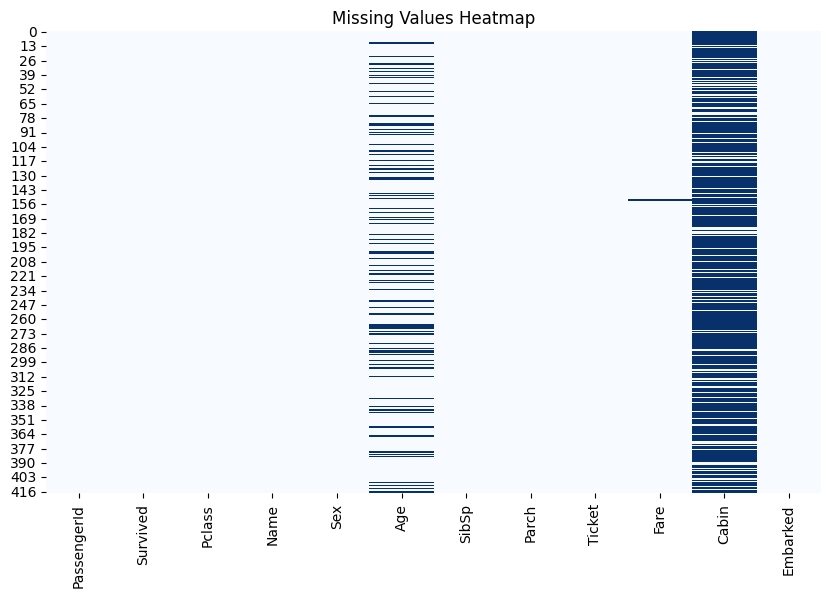

In [5]:
plt.figure(figsize=(10,6))
sb.heatmap(df.isnull(), cbar=False, cmap='Blues')
plt.title("Missing Values Heatmap")
plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
df = df.dropna(subset=['Cabin'])
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

In [8]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [9]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first = True)
df[df.select_dtypes('bool').columns] = df.select_dtypes('bool').astype(int)
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",23.0,1,0,21228,82.2667,B45,0,0,1
14,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",47.0,1,0,W.E.P. 5734,61.1750,E31,0,0,1
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,0,0,0
26,918,1,1,"Ostby, Miss. Helene Ragnhild",22.0,0,1,113509,61.9792,B36,0,0,0
28,920,0,1,"Brady, Mr. John Bertram",41.0,0,0,113054,30.5000,A21,1,0,1


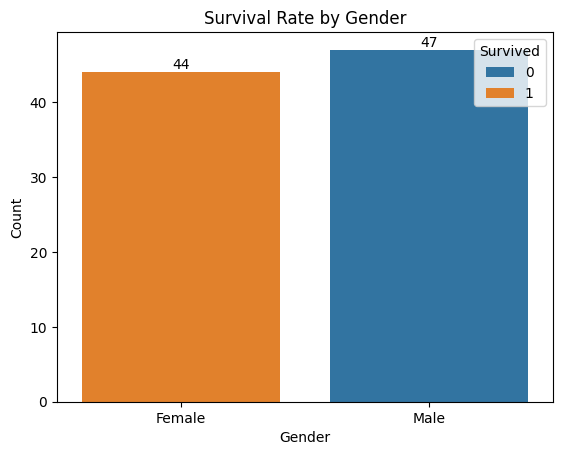

In [10]:
ax = sb.countplot(x = 'Sex_male', hue = 'Survived', data = df)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks([0,1], ['Female', 'Male'])
plt.title("Survival Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()